## Asset Cost Analysis by Department (Flag 17)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow alm_hardware table, detailing key attributes of hardware assets such as asset tags, display names, configuration item (CI) identifiers, serial numbers, and model categories. It includes information on asset assignment, last update timestamps, cost, departmental allocation, and warranty expiration dates. The table effectively captures asset management activities, offering insights into the operational handling, allocation, and maintenance status of hardware resources across various departments within an organization.

### Your Task
**Goal**: Analyze any uneven distribution and higher cost of assets in the certain department, with a particular focus on the HR department, to optimize asset management and enhance cost-effectiveness.

**Role**: Asset Manager

**Difficulty**: 3 out of 5. The task involves complex data analysis skills to uncover the underlying factors contributing to these departmental discrepancies in asset costs and distribution.

**Category**: Asset Management

## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the asset analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further operations. This also checks the initial few rows to verify the correct loading of the data.

In [2]:
dataset_path = "csvs/flag-17.csv"
flag_data = pd.read_csv(dataset_path)
df = flag_data
flag_data.head()

,purchased_on,asset_tag,model_category,cost,serial_number,sys_updated_on,assigned_to,department,warranty_expiration,display_name,ci
0,2024-03-01 17:54:00,P1000000,Computer,3629,DZB-49193876,2024-04-25 17:54:00,Genevieve Kekiwi,Customer Support,2026-04-25 17:54:00,Dell Inspiron 3501 Computer,Inspiron 3501
1,2024-02-12 23:13:00,P1000001,Computer,2970,LKQ-61403004,2024-03-29 23:13:00,Logan Muhl,Customer Support,2026-03-29 23:13:00,Dell Inspiron 7501 Laptop,Inspiron 7501
2,2024-02-13 19:09:00,P1000002,Computer,4701,TYB-81675175,2024-04-12 19:09:00,Latisha Bahls,Customer Support,2025-04-12 19:09:00,Dell Inspiron 3580,Inspiron 3580
3,2024-02-16 23:18:00,P1000003,Computer,2484,AFI-35627823,2024-03-29 23:18:00,Stephen Seiters,HR,2025-03-29 23:18:00,Dell Inspiron Desktop Computer,Inspiron Desktop
4,2024-02-09 18:34:00,P1000004,Computer,1528,ADF-83782545,2024-03-15 18:34:00,Bertram Quertermous,IT,2025-03-15 18:34:00,Dell Optiplex 7080,Optiplex 7080


### **Question 1: What is the average cost of assets across different departments, and how does the HR department compare?**

#### Plot average cost of assets by department
This cell generates a bar plot that illustrates the average cost of assets across various departments, with a specific focus on how the HR department compares to others. By highlighting cost disparities, this visualization aims to identify any anomalies or trends that could aid asset management 

<ipython-input-3-1b929e2424d1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  avg_bar_plot = sns.barplot(data=department_costs, x='department', y='cost', palette="coolwarm")


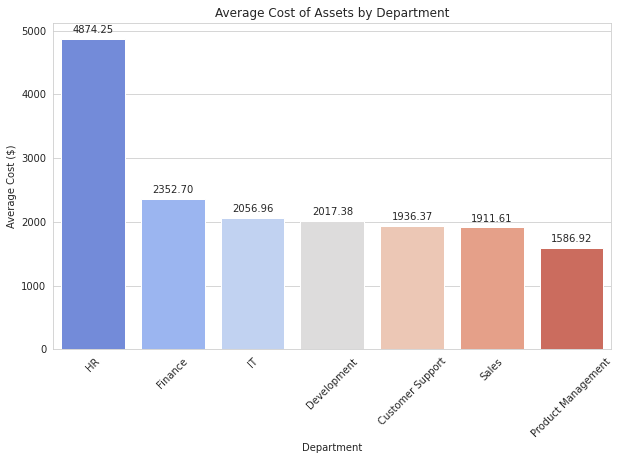

<Figure size 720x432 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by department and calculate the average cost per department
department_costs = flag_data.groupby('department')['cost'].mean().reset_index()

# Sort the data for better visualization, highlighting the HR department
department_costs = department_costs.sort_values(by='cost', ascending=False)

# Set style for nicer aesthetics
sns.set_style("whitegrid")
# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
avg_bar_plot = sns.barplot(data=department_costs, x='department', y='cost', palette="coolwarm")
plt.title('Average Cost of Assets by Department')
plt.xlabel('Department')
plt.ylabel('Average Cost ($)')
plt.xticks(rotation=45)



# Plot
plt.figure(figsize=(10, 6))
# avg_bar_plot = sns.barplot(x='Department', y='Reportees', data=avg_reportees_per_dept, palette="coolwarm")


# Add exact numbers on top of the bars for clarity
for p in avg_bar_plot.patches:
    avg_bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
# Highlight the HR department


plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "The HR Department has significantly Higher Asset Costs compared to other departments",
    "insight_value": {
        "HR": "4874.25",
        "Finance": "2352.7",
        "IT": "2056.96",
        "Development": "2017.38",
        "Customer Support": "1936.37",
        "Sales": "1911.61",
        "Product Management": "1586.92"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Comparison of Average Asset Costs by Department",
        "x_axis": {
            "name": "Department",
            "value": ["HR", "Finance", "IT", "Development", "Customer Support", "Sales", "Product Management"],
            "description": "This represents the different departments within the organization."
        },
        "y_axis": {
            "name": "Average Cost of Assets",
            "value": "Cost in USD",
            "description": "This represents the average cost of assets for each department, highlighting the disparity in asset costs with HR having significantly higher expenses."
        },
        "description": "The bar chart displays the average cost of assets across departments, with the HR department showing more than double the expenses of other departments, potentially due to the inclusion of high-cost items like servers."
    },
    "question": "Why does the HR department have significantly higher average asset costs compared to other departments?",
    "actionable_insight": "Investigating the reasons behind the HR department's higher asset costs could uncover potential inefficiencies or justify the need for high-value asset allocations. Consider reassessing asset procurement strategies to ensure cost-effectiveness across all departments."
}


{'data_type': 'descriptive',
 'insight': 'The HR Department has significantly Higher Asset Costs compared to other departments',
 'insight_value': {'HR': '4874.25',
  'Finance': '2352.7',
  'IT': '2056.96',
  'Development': '2017.38',
  'Customer Support': '1936.37',
  'Sales': '1911.61',
  'Product Management': '1586.92'},
 'plot': {'plot_type': 'bar',
  'title': 'Comparison of Average Asset Costs by Department',
  'x_axis': {'name': 'Department',
   'value': ['HR',
    'Finance',
    'IT',
    'Development',
    'Customer Support',
    'Sales',
    'Product Management'],
   'description': 'This represents the different departments within the organization.'},
  'y_axis': {'name': 'Average Cost of Assets',
   'value': 'Cost in USD',
   'description': 'This represents the average cost of assets for each department, highlighting the disparity in asset costs with HR having significantly higher expenses.'},
  'description': 'The bar chart displays the average cost of assets across departme

### **Question 2:  What types of assets contribute to the higher average cost in the HR department?**


#### Plot total and average cost of different asset types in HR department
This cell visualizes both the total and average costs of various asset types managed by the HR department, aiding in the identification of specific asset categories that contribute to higher overall expenses. By differentiating between total and average costs, the plot provides some understanding of how different types of assets impact the department's financial resources. 

<ipython-input-5-bee142b60bbe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_assets['cost'] = pd.to_numeric(hr_assets['cost'], errors='coerce')


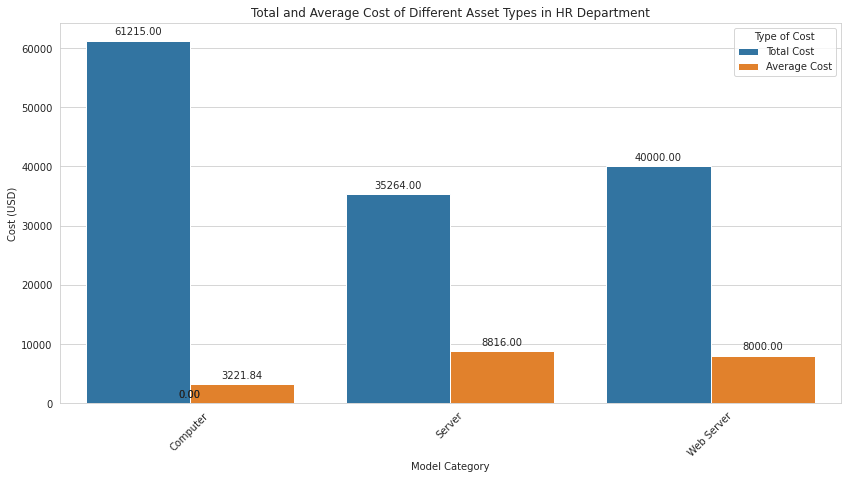

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'df' is your DataFrame containing the asset data
# Filter the DataFrame for only the HR department
hr_assets = df[df['department'] == 'HR']

# Convert the 'cost' column to numeric, just in case it's not already
hr_assets['cost'] = pd.to_numeric(hr_assets['cost'], errors='coerce')

# Calculate total and average cost per model category
total_cost = hr_assets.groupby('model_category')['cost'].sum().reset_index(name='Total Cost')
average_cost = hr_assets.groupby('model_category')['cost'].mean().reset_index(name='Average Cost')

# Merge the total and average cost dataframes
cost_data = pd.merge(total_cost, average_cost, on='model_category')

# Melt the dataframe to suit the seaborn barplot format for grouped bars
melted_cost_data = cost_data.melt(id_vars='model_category', var_name='Type of Cost', value_name='Cost')

# Create the bar plot
plt.figure(figsize=(14, 7))
avg_bar_plot = sns.barplot(data=melted_cost_data, x='model_category', y='Cost', hue='Type of Cost')

for p in avg_bar_plot.patches:
    avg_bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
    
plt.title('Total and Average Cost of Different Asset Types in HR Department')
plt.xlabel('Model Category')
plt.ylabel('Cost (USD)')
plt.xticks(rotation=45)
plt.legend(title='Type of Cost')
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "Computers, Servers, and Web Servers in HR Department have the highest cost contributions",
    "insight_value": {
        "Computers": {"Total Cost": "61215$", "Average Cost": "3221$"},
        "Server": {"Total Cost": "35264$", "Average Cost": "8816$"},
        "Web Server": {"Total Cost": "40000$", "Average Cost": "8000$"}
    },
    "plot": {
        "plot_type": "grouped_bar",
        "title": "Total and Average Cost of Asset Types in HR Department",
        "x_axis": {
            "name": "Model Category",
            "value": ["Computers", "Server", "Web Server"],
            "description": "This represents different asset categories in the HR department."
        },
        "y_axis": {
            "name": "Cost in USD",
            "value": "Displays both total and average costs",
            "description": "This represents both the total and average costs of assets, highlighting which models contribute the most financially."
        },
        "description": "The grouped bar chart demonstrates that Computers, Servers, and Web Servers have the highest total costs in the HR department. Moreover, Servers and Web Servers exhibit higher average costs, indicating their high-end value and significant financial contribution to departmental assets."
    },
    "question": "What types of assets contribute to the higher average cost in the HR department?",
    "actionable_insight": "Considering the high average costs associated with Servers and Web Servers, it is advisable for the HR department to evaluate the necessity and utilization of these high-end assets to ensure cost-effectiveness. Possible actions include reassessing the asset lifecycle, optimizing usage, and exploring cost-saving alternatives without compromising on required functionalities."
}


{'data_type': 'descriptive',
 'insight': 'Computers, Servers, and Web Servers in HR Department have the highest cost contributions',
 'insight_value': {'Computers': {'Total Cost': '61215$',
   'Average Cost': '3221$'},
  'Server': {'Total Cost': '35264$', 'Average Cost': '8816$'},
  'Web Server': {'Total Cost': '40000$', 'Average Cost': '8000$'}},
 'plot': {'plot_type': 'grouped_bar',
  'title': 'Total and Average Cost of Asset Types in HR Department',
  'x_axis': {'name': 'Model Category',
   'value': ['Computers', 'Server', 'Web Server'],
   'description': 'This represents different asset categories in the HR department.'},
  'y_axis': {'name': 'Cost in USD',
   'value': 'Displays both total and average costs',
   'description': 'This represents both the total and average costs of assets, highlighting which models contribute the most financially.'},
  'description': 'The grouped bar chart demonstrates that Computers, Servers, and Web Servers have the highest total costs in the HR dep

### **Question 3:  What are the number of high-end assets such as Server and Web Server across all departments compared with HR department?**

### Plot distribution of expensive assets (Server and Web Server) by department
This cell provides a visual comparison of high-end asset distribution, specifically servers and web servers, across different departments, highlighting how the HR department's holdings compare to others.

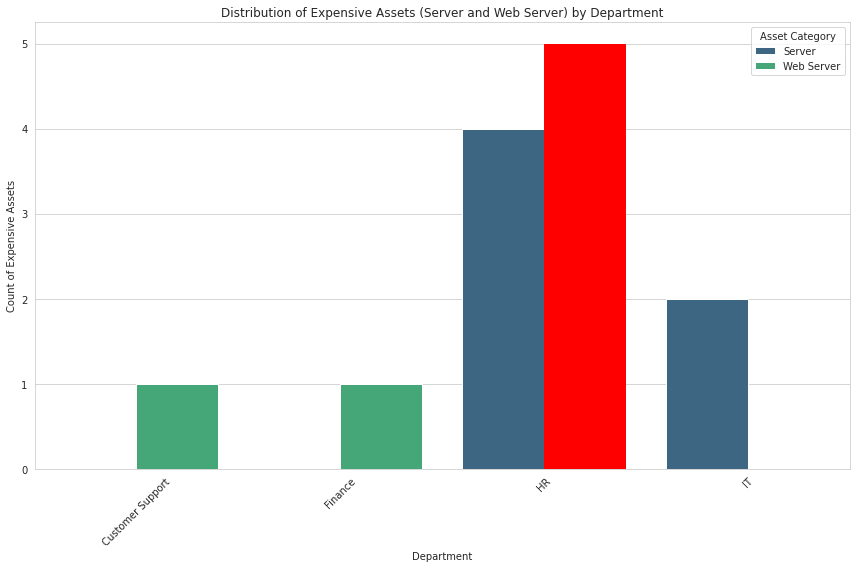

In [7]:
# Filter data for relevant categories (Server and Web Server)
expensive_assets = flag_data[flag_data['model_category'].isin(['Server', 'Web Server'])]

# Count the number of each category within each department
category_counts = expensive_assets.groupby(['department', 'model_category']).size().unstack(fill_value=0).reset_index()

# Create a bar plot showing the counts of Server and Web Server by department
plt.figure(figsize=(12, 8))
sns.barplot(data=category_counts.melt(id_vars=["department"], var_name="model_category", value_name="count"), 
            x='department', y='count', hue='model_category', palette="viridis")
plt.title('Distribution of Expensive Assets (Server and Web Server) by Department')
plt.xlabel('Department')
plt.ylabel('Count of Expensive Assets')
plt.xticks(rotation=45)

# Emphasize the HR department by changing the color of its bars
for bar in plt.gca().patches:
    if bar.get_x() == category_counts.index[category_counts['department'] == 'HR'][0]:
        bar.set_color('red')  # Change color to red for HR department

plt.legend(title='Asset Category')
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "There is a concentration of High-End Assets in the HR Department Compared to Other Departments",
    "insight_value": {
        "HR": {"Servers": "4", "Web Servers": "5"},
        "Customer Support": {"Servers": "0", "Web Servers": "1"},
        "Finance": {"Servers": "0", "Web Servers": "1"},
        "IT": {"Servers": "2", "Web Servers": "0"},
        "Other Departments": {"Servers": "0", "Web Servers": "0"}
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of High-End Assets Across Departments",
        "x_axis": {
            "name": "Department",
            "value": ["HR", "Customer Support", "Finance", "IT", "Other"],
            "description": "This represents the various departments within the organization."
        },
        "y_axis": {
            "name": "Number of High-End Assets",
            "value": "Counts of Servers and Web Servers",
            "description": "This shows the count of high-end assets, specifically Servers and Web Servers, within each department."
        },
        "description": "This bar chart illustrates the distribution of high-end assets across departments, highlighting a significant concentration of Servers and Web Servers in the HR department compared to others. Customer Support and Finance have minimal Web Servers, while IT has a moderate number of Servers, and other departments lack these high-end assets entirely."
    },
    "question": "What is the contribution from high-end assets such as Server and Web Server across all departments to compare with HR department?",
    "actionable_insight": "The HR department's higher allocation of Servers and Web Servers suggests a potential overinvestment in these high-end assets or specific operational needs that justify such investment. It is crucial for the organization to assess the utilization and necessity of these assets in HR compared to other departments. Possible actions include realigning asset distribution based on actual usage and needs, or redistributing underutilized assets to departments that may benefit from them, ensuring optimal asset utilization and cost efficiency across the organization."
}


{'data_type': 'diagnostic',
 'insight': 'There is a concentration of High-End Assets in the HR Department Compared to Other Departments',
 'insight_value': {'HR': {'Servers': '4', 'Web Servers': '5'},
  'Customer Support': {'Servers': '0', 'Web Servers': '1'},
  'Finance': {'Servers': '0', 'Web Servers': '1'},
  'IT': {'Servers': '2', 'Web Servers': '0'},
  'Other Departments': {'Servers': '0', 'Web Servers': '0'}},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of High-End Assets Across Departments',
  'x_axis': {'name': 'Department',
   'value': ['HR', 'Customer Support', 'Finance', 'IT', 'Other'],
   'description': 'This represents the various departments within the organization.'},
  'y_axis': {'name': 'Number of High-End Assets',
   'value': 'Counts of Servers and Web Servers',
   'description': 'This shows the count of high-end assets, specifically Servers and Web Servers, within each department.'},
  'description': 'This bar chart illustrates the distribution of high-end

### **Question 4: Is there a correlation between the number of users and the cost of computer assets in the HR department?**


#### Plot number of users and computers per department
This cell focuses on analysis to explore the correlation between number of users and  number of computer assets in each department, particualrly the HR department. The objective is to understand how the distribution of computer assets aligns with the staffing levels across departments

           department  Total Computers  Total Users
0    Customer Support               86           66
1         Development               12            9
2             Finance               15           11
3                  HR               19            4
4                  IT               36           32
5  Product Management                8            7
6               Sales               71           54


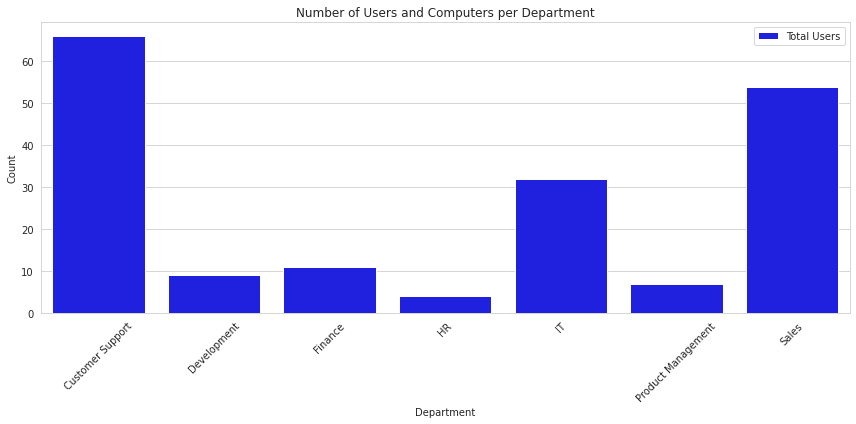

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'flag_data' is the DataFrame that contains the entire asset dataset

# Filter for entries where 'model_category' is 'Computer'
computers_data = flag_data[flag_data['model_category'] == 'Computer']

# Group by 'department' and count the number of computers per department
computers_per_department = computers_data.groupby('department').size().reset_index(name='Total Computers')

# Group by 'department' and count unique users per department
users_per_department = flag_data.groupby('department')['assigned_to'].nunique().reset_index(name='Total Users')

# Merge the two dataframes on 'department'
department_summary = pd.merge(computers_per_department, users_per_department, on='department', how='outer')

# Fill any NaN values which might appear if there are departments with no computers or users
department_summary.fillna(0, inplace=True)

# Print the result
print(department_summary)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=department_summary, x='department', y='Total Users', color='blue', label='Total Users')
# sns.barplot(data=department_summary, x='department', y='Total Computers', color='red', alpha=0.6, label='Total Computers')

plt.title('Number of Users and Computers per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "There is a weak correlation between mumber of users and high cost of computer assets in HR Department",
    "insight_value": {
        "Number of Users in HR": "4",
        "Total Cost of Computers": "60000$",
        "Average Cost per User": "15000$ per user"
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Correlation Between Number of Users and Cost of Computers in HR Department",
        "x_axis": {
            "name": "Number of Users",
            "value": "4",
            "description": "This represents the total number of users within the HR department."
        },
        "y_axis": {
            "name": "Cost of Computer Assets",
            "value": "60000$",
            "description": "This indicates the total cost of computer assets within the HR department, averaged per user."
        },
        "description": "This scatter plot visually represents the relationship between the number of users in the HR department and the total cost of their computer assets. Despite having the least number of users among all departments, the HR department shows a disproportionately high cost of computer assets, indicating a weak correlation between the number of users and asset costs."
    },
    "question": "Is there a correlation between the number of users and the cost of computer assets in the HR department?",
    "actionable_insight": "Given the disproportionate cost of computer assets relative to the small number of users in the HR department, it is advisable to review the justification for such high expenses. The organization should consider evaluating the specific needs of the HR department's users to ensure that these assets are essential and effectively utilized. Further investigation into the procurement process may also reveal opportunities for cost optimization without compromising operational efficiency."
}


{'data_type': 'diagnostic',
 'insight': 'There is a weak correlation between mumber of users and high cost of computer assets in HR Department',
 'insight_value': {'Number of Users in HR': '4',
  'Total Cost of Computers': '60000$',
  'Average Cost per User': '15000$ per user'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Number of Users and Cost of Computers in HR Department',
  'x_axis': {'name': 'Number of Users',
   'value': '4',
   'description': 'This represents the total number of users within the HR department.'},
  'y_axis': {'name': 'Cost of Computer Assets',
   'value': '60000$',
   'description': 'This indicates the total cost of computer assets within the HR department, averaged per user.'},
  'description': 'This scatter plot visually represents the relationship between the number of users in the HR department and the total cost of their computer assets. Despite having the least number of users among all departments, the HR department shows a disprop

### **Question 5: What is average number of Computers per User in HR deparmtent and how does it compare with other departments?**
  


#### Plot average number of computers per user across departments
This cell visualizes the average number of computers per user across different departments, with an emphasis on comparing these ratios to see how well computer resources are distributed in relation to staff size. This analysis specifically seeks to highlight if any department, such as HR, is disproportionately equipped with computer assets compared to others.

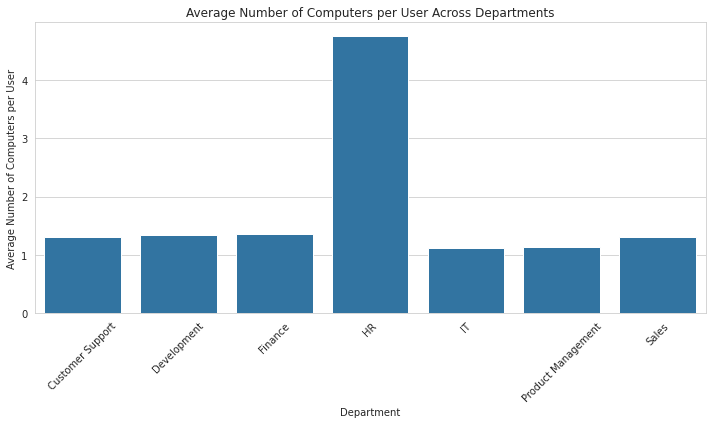

In [11]:
# Filter for only 'Computer' model_category
computers_data = flag_data[flag_data['model_category'] == 'Computer']

# Group by department and count the number of computers
department_computer_counts = computers_data.groupby('department').size()

# Count the number of unique users in each department
department_user_counts = flag_data.groupby('department')['assigned_to'].nunique()

# Calculate the average number of computers per user in each department
average_computers_per_user = department_computer_counts / department_user_counts
average_computers_per_user = average_computers_per_user.reset_index(name='Average Number of Computers per User')

# Plotting using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='Average Number of Computers per User', data=average_computers_per_user)
plt.xticks(rotation=45)
plt.title('Average Number of Computers per User Across Departments')
plt.xlabel('Department')
plt.ylabel('Average Number of Computers per User')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "diagnostic",
    "insight": "There is an excessive number of computers per user in HR Department",
    "insight_value": {
        "HR": "4.5 computers per user",
        "Other Departments": "Less than 2 computers per user"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Number of Computers per User by Department",
        "x_axis": {
            "name": "Department",
            "value": ["HR", "Finance", "IT", "Development", "Customer Support", "Sales", "Product Management"],
            "description": "This represents all departments within the organization, highlighting the disparity in the distribution of computer assets."
        },
        "y_axis": {
            "name": "Average Number of Computers per User",
            "value": "Computers",
            "description": "This measures the average number of computers allocated per user in each department, illustrating significant variance between HR and other departments."
        },
        "description": "The bar chart vividly illustrates that the HR department has an average of 4.5 computers per user, which is significantly higher than the average in other departments, where it is less than 2. This suggests a potential deviation from company policy, which typically restricts users to no more than 2 computers."
    },
    "question": "What is the average number of Computers per User in the HR department, and how does it compare with other departments?",
    "actionable_insight": "The HR department's exceptionally high average of computers per user warrants a thorough review to ensure compliance with company asset distribution policies. It is crucial to investigate the reasons behind this anomaly and consider corrective measures to align the HR department with company standards. Possible actions may include reallocation of excess assets or revision of policies to prevent similar issues in the future."
}


{'data_type': 'diagnostic',
 'insight': 'There is an excessive number of computers per user in HR Department',
 'insight_value': {'HR': '4.5 computers per user',
  'Other Departments': 'Less than 2 computers per user'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Number of Computers per User by Department',
  'x_axis': {'name': 'Department',
   'value': ['HR',
    'Finance',
    'IT',
    'Development',
    'Customer Support',
    'Sales',
    'Product Management'],
   'description': 'This represents all departments within the organization, highlighting the disparity in the distribution of computer assets.'},
  'y_axis': {'name': 'Average Number of Computers per User',
   'value': 'Computers',
   'description': 'This measures the average number of computers allocated per user in each department, illustrating significant variance between HR and other departments.'},
  'description': 'The bar chart vividly illustrates that the HR department has an average of 4.5 computers per user,

### Summary of Findings (Flag 17):

1. **High Asset Costs in HR**: This dataset reveals a trend where the average cost of assets in the HR department is notably higher compared to other departments. This includes significant investments in high-value assets such as servers and web servers.
   
2. **Anomalous Asset Distribution**: Additionally, the dataset points out an anomaly where the average number of computers per user in the HR department exceeds two, which is unusually high and demands further investigation.
   
3. **Data Insights**: The dataset encompasses asset management records from the ServiceNow alm_hardware table, detailing fields such as asset cost, department allocation, model category, and user assignments. It provides a comprehensive overview of asset distribution and cost across different departments, offering a basis for targeted asset management improvements.